<a href="https://colab.research.google.com/github/LeDangXuanBach/Machine-learning/blob/main/Lab_7_20130199_LeDangXuanBach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [34]:
#code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/Data_lab7'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/Data_lab7


In [41]:
# code
from sklearn import datasets
from sklearn import svm
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,  f_classif
import pandas as pd

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import AgglomerativeClustering

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

from prettytable import PrettyTable



#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [50]:
#code

data1 = datasets.load_iris()
X = data1.data
y = data1.target

svm_l1 = svm.SVC(kernel='linear')
scores = cross_validate(svm_l1, X, y, scoring='accuracy', cv=10)
print("SVM kernel linear mean score")
print(np.mean(scores['test_score']))


SVM kernel linear mean score
0.9733333333333334


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [51]:
#code

# feature selection
test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(X, y)
X_new = fit.transform(X)

# random forest
rfc=RandomForestClassifier(n_estimators=100)
scores = cross_validate(rfc, X_new, y, scoring='accuracy', cv=10)
print("Random forest mean score")
print(np.mean(scores['test_score']))

Random forest mean score
0.9666666666666666


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [52]:
# code
mnist = datasets.load_digits();
X2 = mnist.data
y2 = mnist.target

Kmeans = KMeans(n_clusters= 10)
scores = cross_validate(Kmeans, X2, y2, scoring = "recall_macro", cv = 10)

print("\n\n")
print("K Means mean score")
print(np.mean(scores['test_score']))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F




K Means mean score
0.08446998624011008


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [53]:
# code

# random forest
rfc = RandomForestClassifier(n_estimators=100)
scores = cross_validate(rfc, X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], cv=10)

t2 = PrettyTable(["Algorithm", "Accuracy", "Precision", "Recall", "F1 measures"])
t2.add_row(["Random forest",round(np.mean(scores['test_accuracy']), 4) ,round(np.mean(scores['test_precision_macro']), 4) ,round(np.mean(scores['test_recall_macro']), 4) ,round(np.mean(scores['test_f1_macro']), 4) ])

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn, X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], cv=10)

t2.add_row(["KNN",round(np.mean(scores['test_accuracy']), 4) ,round(np.mean(scores['test_precision_macro']), 4) ,round(np.mean(scores['test_recall_macro']), 4) ,round(np.mean(scores['test_f1_macro']), 4) ])

# Naive Bayes
gnb = GaussianNB()
scores = cross_validate(gnb, X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], cv=10)

t2.add_row(["Naive Bayes",round(np.mean(scores['test_accuracy']), 4) ,round(np.mean(scores['test_precision_macro']), 4) ,round(np.mean(scores['test_recall_macro']), 4) ,round(np.mean(scores['test_f1_macro']), 4) ])

print(t2)


+---------------+----------+-----------+--------+-------------+
|   Algorithm   | Accuracy | Precision | Recall | F1 measures |
+---------------+----------+-----------+--------+-------------+
| Random forest |  0.9667  |   0.9722  | 0.9667 |    0.9663   |
|      KNN      |  0.9667  |   0.9738  | 0.9667 |    0.9659   |
|  Naive Bayes  |  0.9533  |   0.9627  | 0.9533 |    0.9524   |
+---------------+----------+-----------+--------+-------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [54]:
#code
print("Học có giám sát (Supervised learning) tốt hơn học không giám sát (Unsupervised learning) vì học có giám sát cho độ chính xác cao hơn")

Học có giám sát (Supervised learning) tốt hơn học không giám sát (Unsupervised learning) vì học có giám sát cho độ chính xác cao hơn


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[7 9 4 ... 4 1 4]


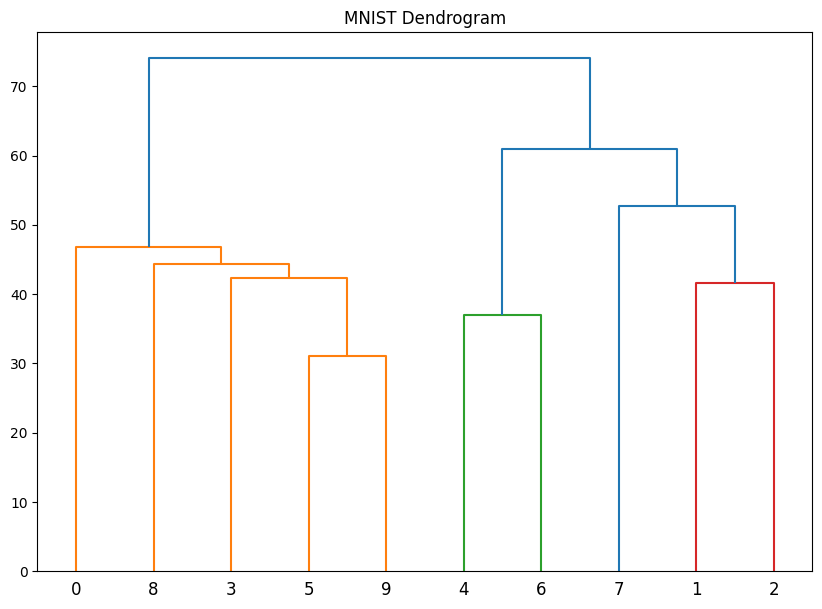

In [60]:
#code

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(mnist.data)

# print dendogram
plt.figure(figsize=(10, 7))
plt.title("MNIST Dendrogram")
dend = shc.dendrogram(shc.linkage(mnist.data[:10,:], method='ward'))

print(labels)

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





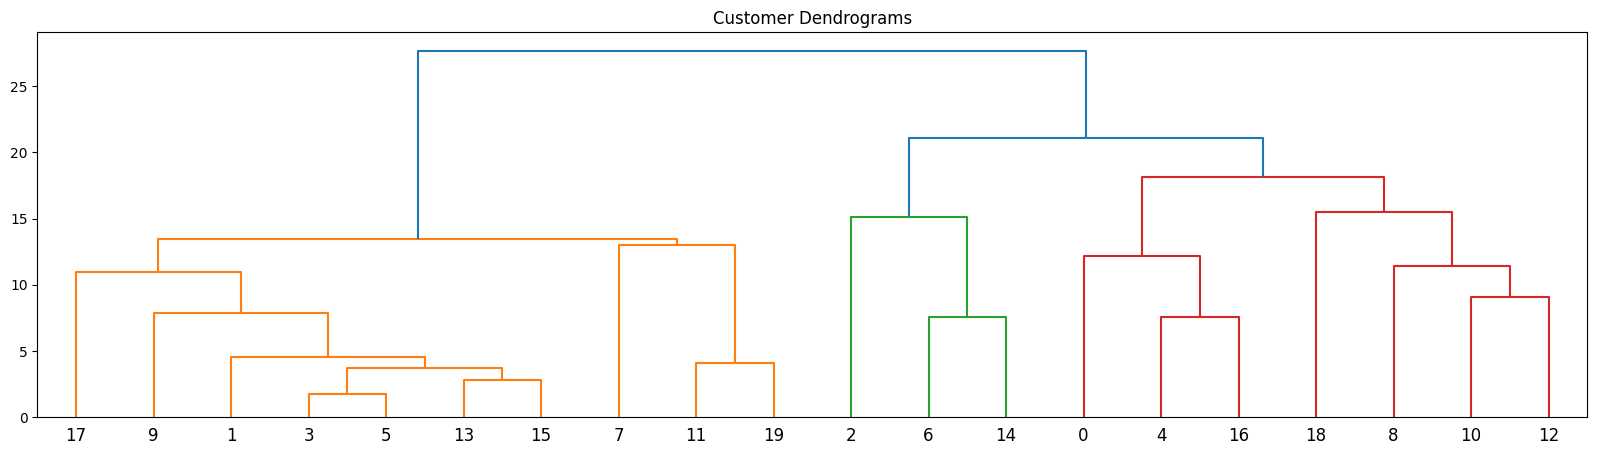

In [63]:
#code
shoppingdata = pd.read_csv("shopping-data.csv")
shoppingdata = shoppingdata.drop(['CustomerID', 'Genre'], axis=1)

plt.figure(figsize=(20, 5))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(shoppingdata.iloc[:20, :], method='single'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

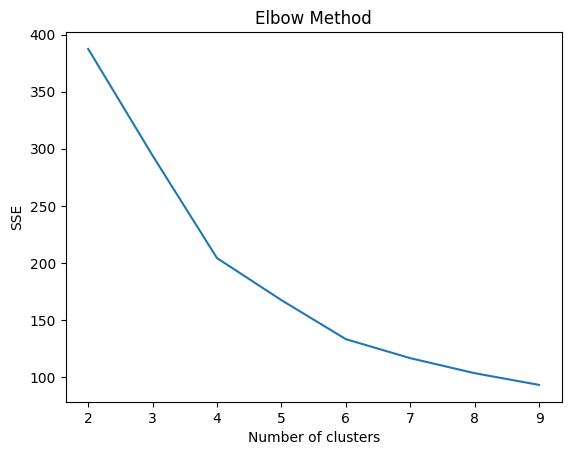

In [67]:
#code
shoppingdata = (shoppingdata - shoppingdata.mean()) / shoppingdata.std()
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(shoppingdata)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [68]:
#code
shoppingdata = pd.read_csv("shopping-data.csv")

shoppingdata = shoppingdata.drop(['CustomerID', 'Genre'], axis=1)
agglomerative = AgglomerativeClustering(n_clusters=4)
agglomerative.fit(shoppingdata)

print(agglomerative.labels_)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 0 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#Finally,
Save a copy in your Github. Remember renaming the notebook.